In [2]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


### Renomeando as colunas

In [3]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


#### Trocando o as valores das linhas

In [4]:
troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [5]:
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


#### Visualizando as informações

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

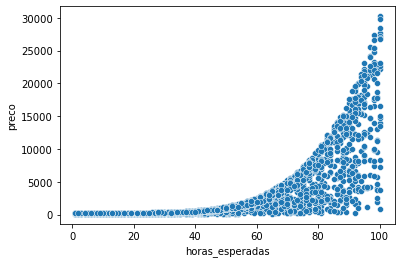

In [6]:
import seaborn as sns

sns.scatterplot(x='horas_esperadas', y='preco', data=dados)

#### Visualizando se o projeto foi finalizado ou não

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

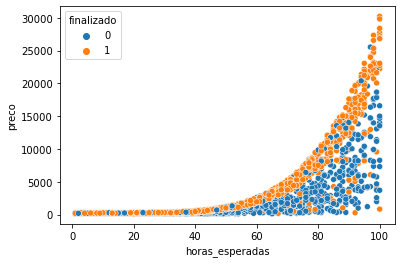

In [7]:
sns.scatterplot(x='horas_esperadas', y='preco',hue="finalizado", data=dados)

Dividindo em projetos finalizados e não finalizados

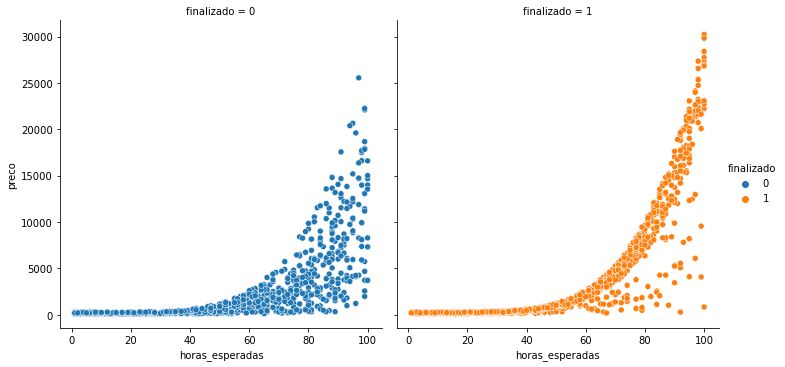

In [8]:
sns.relplot(x='horas_esperadas', y='preco',hue='finalizado', col="finalizado", data=dados)

#### Tentando modelar 

In [9]:
x = dados[['horas_esperadas', 'preco']]
y = dados[['finalizado']]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Vou definir uma semente para que o resultado estar sempre constante (muito importante!! tem que sempre ser feito)
SEED = 5


treino_x, teste_x, treino_y, teste_y = train_test_split(x , y, random_state = SEED, test_size = 0.25,
                                                      stratify = y # Separar proporcionalmente de acordo com y
                                                       ) # Separando mais rapidamente o treino do teste
print("Treinaremos com %d elementos e testaresmos com %d elementos" %(len(treino_x), len(teste_x)))

modelo = LinearSVC() # cria o modelo
modelo.fit(treino_x, treino_y) # treina em cima do treino x e treno y
previsoes = modelo.predict(teste_x) # testanto

acuracia = accuracy_score(teste_y, previsoes) * 100 # comparando as previsoes com o teste_y
print("A acurácia foi %.2f%%" %acuracia)

Treinaremos com 1617 elementos e testaresmos com 540 elementos
A acurácia foi 47.41%
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


#### Criando um algoritmo de base

In [11]:
import numpy as np
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100 # comparando as previsoes com o teste_y
print("A acurácia do algoritmo de baseline foi %.2f%%" %acuracia)

A acurácia do algoritmo de baseline foi 52.59%


In [12]:
#x = dados[['horas_esperadas', 'preco']]
#y = dados['finalizado']

In [13]:
#treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25)

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

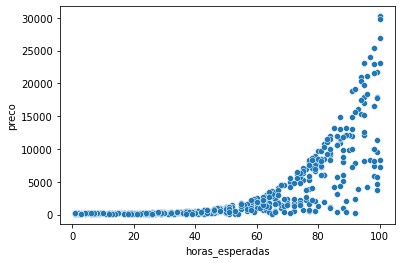

In [14]:
import seaborn as sns
sns.scatterplot(x="horas_esperadas", y="preco", data=teste_x) 

In [15]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [16]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [17]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [18]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

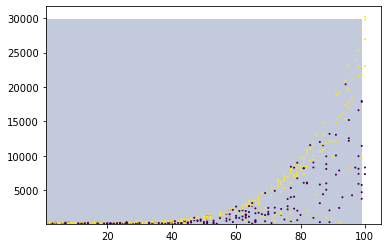

In [21]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y.values, s=1)

#DECISION BOUNDARY